In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
planets = pd.read_csv("planets.csv")
sns.set(style="ticks")
#cleaned dataset.
planets.head()


,pl_name,hostname,default_flag,sy_snum,sy_pnum,pl_rade,pl_bmasse,pl_orbeccen,pl_insol,pl_eqt,ttv_flag,st_spectype,st_teff,st_rad,st_mass,sy_refname,sy_dist,sy_gaiamag
0,11 Com b,11 Com,1,2,1,NaN,6165.6000,0.231,NaN,NaN,0,G8 III,4742.0,19.00,2.70,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,93.1846,4.44038
1,11 Com b,11 Com,0,2,1,NaN,5434.7000,NaN,NaN,NaN,0,NaN,NaN,NaN,2.60,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,93.1846,4.44038
2,11 UMi b,11 UMi,0,1,1,NaN,3337.0700,0.080,NaN,NaN,0,K4 III,4340.0,24.08,1.80,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,125.3210,4.56216
3,11 UMi b,11 UMi,1,1,1,NaN,4684.8142,0.080,NaN,NaN,0,NaN,4213.0,29.79,2.78,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,125.3210,4.56216
4,11 UMi b,11 UMi,0,1,1,NaN,3432.4000,NaN,NaN,NaN,0,NaN,NaN,NaN,1.70,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,125.3210,4.56216


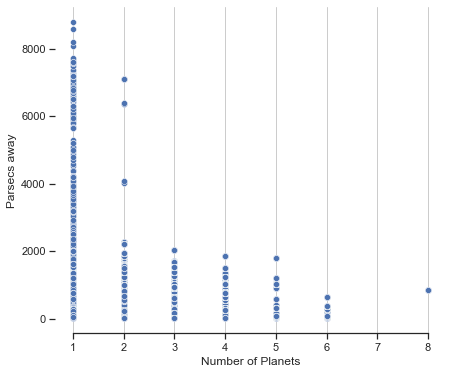

In [29]:
#Scatterplot showing the relationship between the number of exoplanets in a solar system and how far away they are.
f, ax = plt.subplots(figsize=(7, 6))


sns.scatterplot(x="sy_pnum", y="sy_dist", data=planets) 


ax.xaxis.grid(True)
ax.set(ylabel="Parsecs away")
ax.set(xlabel="Number of Planets")
sns.despine(trim=True, left=True)

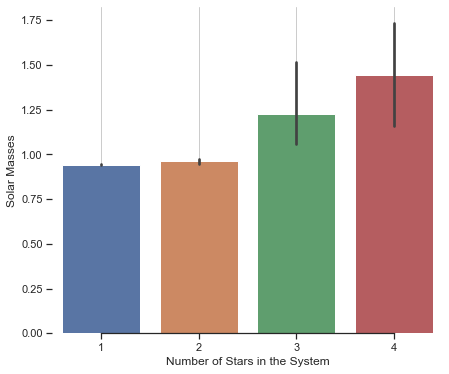

In [30]:
#Barplot showing the relationship between the number of stars in a system and the mass of the star in solar masses.
f, ax = plt.subplots(figsize=(7, 6))
sns.barplot(x="sy_snum", y="st_mass", data=planets) 
ax.xaxis.grid(True)
ax.set(ylabel="Solar Masses")
ax.set(xlabel="Number of Stars in the System")
sns.despine(trim=True, left=True)

In [37]:
print(planets['st_spectype'].value_counts())

G0 V       59
G5 V       55
G5         50
M0 V       49
F8 V       44
           ..
M0.5 Ve     1
G7 IV/V     1
K7-M0 V     1
B9 V        1
M7.25       1
Name: st_spectype, Length: 203, dtype: int64


In [41]:
planets = planets.dropna()
planets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 370 to 29640
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pl_name       74 non-null     object 
 1   hostname      74 non-null     object 
 2   default_flag  74 non-null     int64  
 3   sy_snum       74 non-null     int64  
 4   sy_pnum       74 non-null     int64  
 5   pl_rade       74 non-null     float64
 6   pl_bmasse     74 non-null     float64
 7   pl_orbeccen   74 non-null     float64
 8   pl_insol      74 non-null     float64
 9   pl_eqt        74 non-null     float64
 10  ttv_flag      74 non-null     int64  
 11  st_spectype   74 non-null     object 
 12  st_teff       74 non-null     float64
 13  st_rad        74 non-null     float64
 14  st_mass       74 non-null     float64
 15  sy_refname    74 non-null     object 
 16  sy_dist       74 non-null     float64
 17  sy_gaiamag    74 non-null     float64
dtypes: float64(10), int64(4), o

Text(0.5, 1.0, 'Temperature - Mass Relation with Spectral Class')

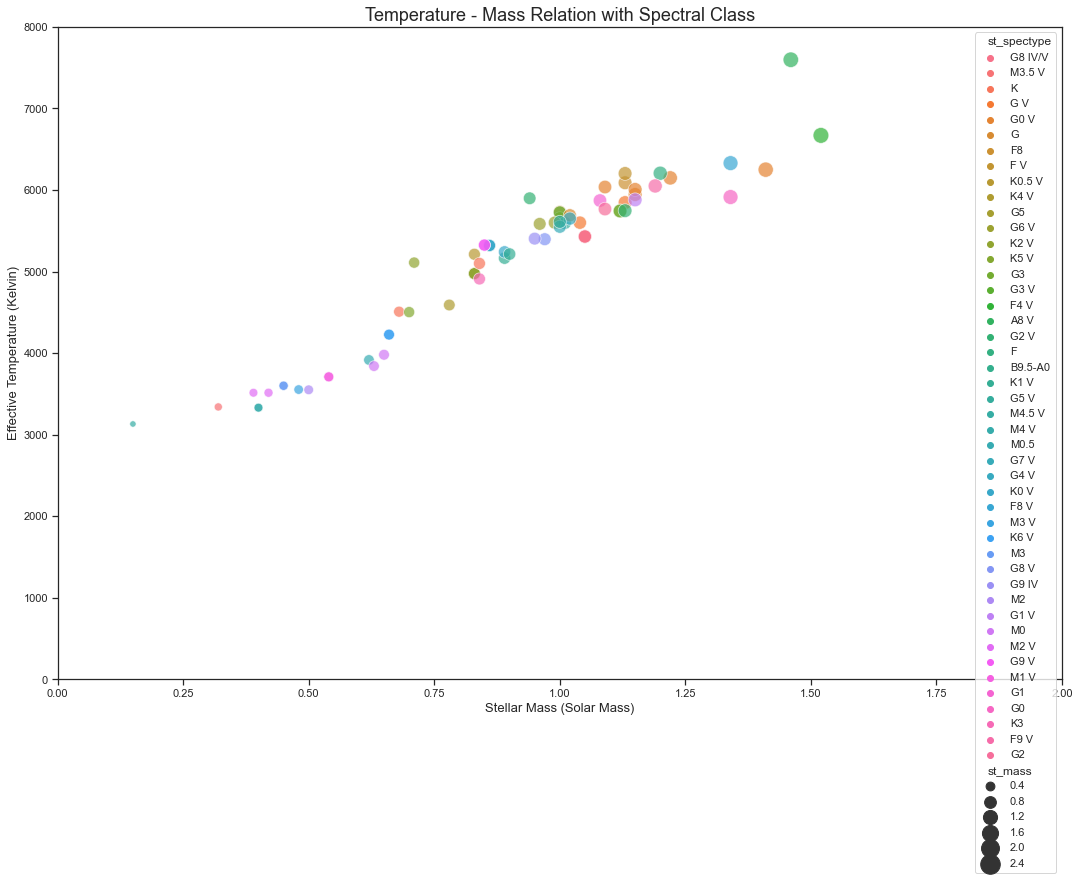

In [48]:
plt.figure(figsize=(18, 12))
ax = sns.scatterplot(x='st_mass', y='st_teff',
                     hue='st_spectype', size='st_mass',
                     sizes=(40, 400), alpha=.7,
                     data=planets)
# limiting x and y axis's values
ax.axis([0,2, 0, 8000])
ax.set_xlabel('Stellar Mass (Solar Mass)', fontsize=13)
ax.set_ylabel('Effective Temperature (Kelvin)', fontsize=13)
ax.set_title('Temperature - Mass Relation with Spectral Class', fontsize=18)